### Machine Learning Final Exams Homework
#### Okaba Mark N.
#### 191144119



Classify on a benchmark dataset (eg IMDB) using techniques such as bag of words, TF-IDF, n-gram for text classification. For classification method, you can use SVM, Bayesian Classification, Decision tree. There are some datasets in the link below.

the https://www.kaggle.com/datasets?search=text+classificatio

In addition, by making feature extraction from new techniques such as fasttext, NLTK, make classification procedures with deep learning (LSTM, CNN etc).

In [1]:
# Import libraries and modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn import tree
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read and display data shape
imdb = pd.read_csv('IMDB_dataset.csv', nrows=50000)
imdb.shape

(50000, 2)

In [3]:
# Display last 5 rows of data
imdb.tail()

,review,sentiment
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative
49999,No one expects the Star Trek movies to be high...,negative


In [4]:
# Summarize data
imdb.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


#### Check  distribution of data

(-1.1, 1.1, -1.1, 1.1)

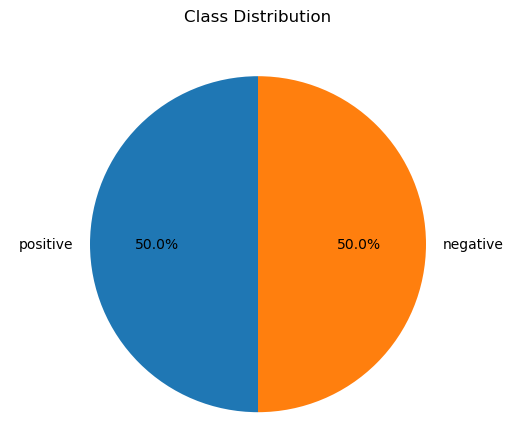

In [5]:
class_dist = imdb.groupby('sentiment').size()
labels = 'positive','negative',
fig, ax = plt.subplots()
ax.set_title('Class Distribution', y=1.08)
ax.pie(class_dist, labels=labels, autopct='%1.1f%%',
       shadow=False, startangle=90)
ax.axis('equal')

In [6]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 

# Encode labels in column 'species'. 
imdb['sentiment']= label_encoder.fit_transform(imdb['sentiment']) 

imdb['sentiment'].unique() 


array([1, 0])

#### Movie reviews vary in length. For example one movie review may contain 20 words while a second one 500 words.Below is a visualization of review length

Max length of sentence: 13704
Average length of sentence: 1309.43102


<Axes: ylabel='Density'>

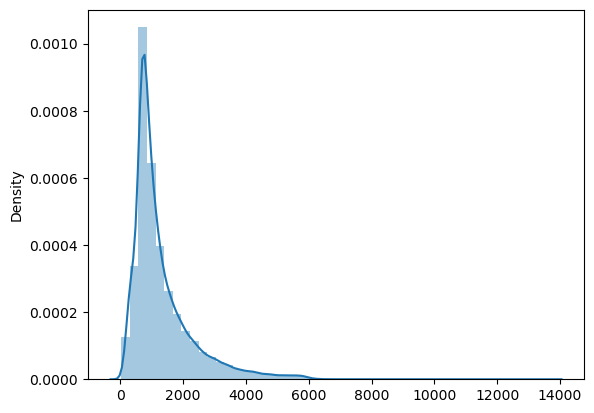

In [7]:
lengths = [len(i) for i in imdb['review']]
print(f'Max length of sentence: {max(lengths)}')
print(f'Average length of sentence: {np.mean(lengths)}')

sns.distplot(lengths)

### PART A
Feature Extraction with Bag of words, TFIDF
Clasification with Naive Bayes, SVM and Decision Tree

#### Bag of Words
In order to perform machine learning on text documents, we first need to turn the text content into numerical feature vectors. Text preprocessing, tokenizing and filtering of stopwords are all included in CountVectorizer, which builds a dictionary of features and transforms documents to feature vectors

In [8]:
cv = CountVectorizer(stop_words='english') 

#`data` is an array of strings

data_cv = cv.fit_transform(imdb['review']) 
 
print(data_cv)

  (0, 75307)	1
  (0, 57407)	1
  (0, 97949)	2
  (0, 48334)	2
  (0, 65272)	6
  (0, 30033)	2
  (0, 53078)	3
  (0, 42725)	1
  (0, 75711)	2
  (0, 30888)	1
  (0, 40335)	1
  (0, 11989)	6
  (0, 90149)	1
  (0, 86368)	2
  (0, 12922)	1
  (0, 94350)	1
  (0, 78541)	1
  (0, 96866)	4
  (0, 80101)	1
  (0, 99790)	2
  (0, 92697)	1
  (0, 31830)	1
  (0, 41057)	1
  (0, 90720)	1
  (0, 71391)	1
  :	:
  (49999, 94388)	1
  (49999, 51878)	1
  (49999, 45918)	1
  (49999, 31231)	1
  (49999, 7135)	1
  (49999, 40422)	1
  (49999, 61554)	1
  (49999, 44791)	1
  (49999, 44468)	1
  (49999, 32066)	1
  (49999, 6021)	1
  (49999, 92188)	1
  (49999, 49694)	1
  (49999, 84569)	1
  (49999, 56562)	1
  (49999, 74509)	1
  (49999, 30034)	1
  (49999, 13815)	1
  (49999, 15907)	1
  (49999, 31243)	1
  (49999, 38040)	1
  (49999, 74502)	1
  (49999, 60227)	1
  (49999, 21222)	1
  (49999, 100763)	1


CountVectorizer supports counts of N-grams of words or consecutive characters. Once fitted, the vectorizer has built a dictionary of feature indices:

In [9]:
#create a dictionary with feature names as keys and row elements as values

feature_names = cv.vocabulary_.items()

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))

n_items = take(100, feature_names)

print(n_items)

[('reviewers', 75307), ('mentioned', 57407), ('watching', 97949), ('just', 48334), ('oz', 65272), ('episode', 30033), ('ll', 53078), ('hooked', 42725), ('right', 75711), ('exactly', 30888), ('happened', 40335), ('br', 11989), ('thing', 90149), ('struck', 86368), ('brutality', 12922), ('unflinching', 94350), ('scenes', 78541), ('violence', 96866), ('set', 80101), ('word', 99790), ('trust', 92697), ('faint', 31830), ('hearted', 41057), ('timid', 90720), ('pulls', 71391), ('punches', 71438), ('regards', 73904), ('drugs', 27374), ('sex', 80196), ('hardcore', 40397), ('classic', 17478), ('use', 95543), ('called', 14048), ('nickname', 62053), ('given', 37368), ('oswald', 64572), ('maximum', 56385), ('security', 79484), ('state', 85330), ('penitentary', 66873), ('focuses', 34150), ('mainly', 54835), ('emerald', 29180), ('city', 17324), ('experimental', 31282), ('section', 79463), ('prison', 70404), ('cells', 15522), ('glass', 37444), ('fronts', 35325), ('face', 31709), ('inwards', 46429), ('p

#### TFIDF
Occurrence count is a good start but there is an issue: longer documents will have higher average count values than shorter documents, even though they might talk about the same topics.

To avoid these potential discrepancies it suffices to divide the number of occurrences of each word in a document by the total number of words in the document: these new features are called tf for Term Frequencies.

Another refinement on top of tf is to downscale weights for words that occur in many documents in the corpus and are therefore less informative than those that occur only in a smaller portion of the corpus.

This downscaling is called tf–idf for “Term Frequency times Inverse Document Frequency”.

Both tf and tf–idf can be computed as follows using TfidfTransformer:

In [10]:
tfidf_transformer = TfidfTransformer()
data_tfidf = tfidf_transformer.fit_transform(data_cv)
print(data_tfidf)

  (0, 99942)	0.04890625187524952
  (0, 99790)	0.10106152333280637
  (0, 97949)	0.06640307906559108
  (0, 97942)	0.04060482426826181
  (0, 96866)	0.20166193716918787
  (0, 96687)	0.052823065115059846
  (0, 95543)	0.04330805826017266
  (0, 94350)	0.09621766058082629
  (0, 93828)	0.07204497358511446
  (0, 93010)	0.05016850503426771
  (0, 92697)	0.06278876578654086
  (0, 91511)	0.0580728294584372
  (0, 90720)	0.0913102464564074
  (0, 90149)	0.03334777573803177
  (0, 89911)	0.06267083844508398
  (0, 88955)	0.05893040275234511
  (0, 87591)	0.06704159867502894
  (0, 86368)	0.1431390266551642
  (0, 86184)	0.05552904598205105
  (0, 85330)	0.05686590370067768
  (0, 85241)	0.08787994726475461
  (0, 83481)	0.07067371101033648
  (0, 82225)	0.06541823446381036
  (0, 81257)	0.04097039608076125
  (0, 80321)	0.0868777963643151
  :	:
  (49999, 50018)	0.11358277787914993
  (49999, 49694)	0.18939483531126416
  (49999, 48334)	0.050423763523793234
  (49999, 45918)	0.19194566854288797
  (49999, 44791)	0.1150

In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_tfidf, imdb['sentiment'], test_size=0.30)

#### Now that we have our features, we can train a classifier to try to predict the category of a post. Let’s start with a naïve Bayes classifier, which provides a nice baseline for this task. scikit-learn includes several variants of this classifier; the one most suitable for word counts is the multinomial variant:

####  Naive Bayes Classification

In [12]:
bayes_clf = MultinomialNB().fit(X_train, y_train)
bayes_clf_predicted = bayes_clf.predict(X_test)
print('Test accuracy: %.2f%%' % (np.mean(bayes_clf_predicted == y_test)*100))

Test accuracy: 86.79%


In [13]:
#Classification report for bag of words for Naive Bayes classification
bayes_clf_report=classification_report(y_test,bayes_clf_predicted,target_names=['Positive','Negative'])
print(bayes_clf_report)

              precision    recall  f1-score   support

    Positive       0.86      0.88      0.87      7483
    Negative       0.88      0.85      0.87      7517

    accuracy                           0.87     15000
   macro avg       0.87      0.87      0.87     15000
weighted avg       0.87      0.87      0.87     15000



[[6415 1102]
 [ 880 6603]]


<Axes: >

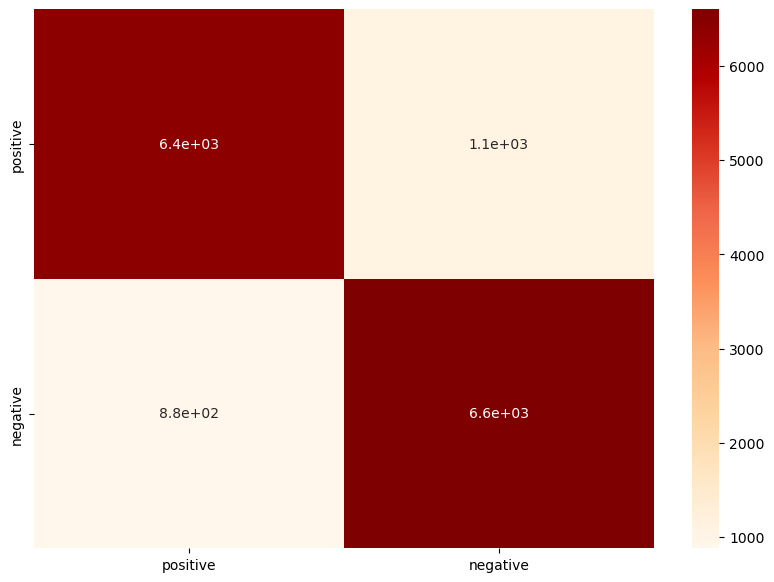

In [14]:
bayes_clf_cm=confusion_matrix(y_test,bayes_clf_predicted,labels=[1,0])
print(bayes_clf_cm)

# Plot Confusion Matrix for Naive Bayes
bayes_clf_dm = pd.DataFrame(bayes_clf_cm, index = [i for i in ['positive', 'negative']],
              columns = [i for i in ['positive', 'negative']])
plt.figure(figsize = (10,7))
sns.heatmap(bayes_clf_dm, annot=True,cmap="OrRd")

####  Linear SVC Classification

In [15]:
LinearSVC_clf = LinearSVC().fit(X_train, y_train)
LinearSVC_clf_predicted = LinearSVC_clf.predict(X_test)
print('Test accuracy: %.2f%%' % (np.mean(LinearSVC_clf_predicted == y_test)*100))

Test accuracy: 89.51%


In [16]:
#Classification report for bag of words 
LinearSVC_clf_report=classification_report(y_test,LinearSVC_clf_predicted,target_names=['Positive','Negative'])
print(LinearSVC_clf_report)

              precision    recall  f1-score   support

    Positive       0.90      0.89      0.89      7483
    Negative       0.89      0.90      0.90      7517

    accuracy                           0.90     15000
   macro avg       0.90      0.90      0.90     15000
weighted avg       0.90      0.90      0.90     15000



[[6759  758]
 [ 816 6667]]


<Axes: >

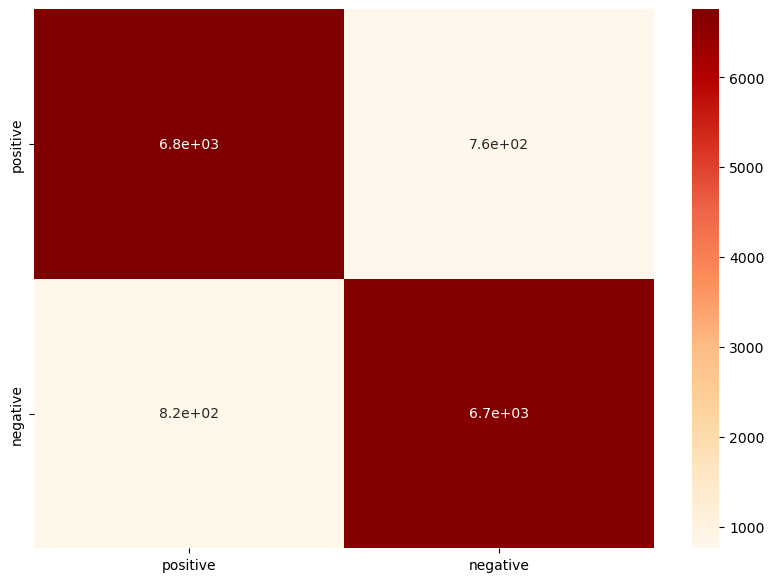

In [17]:
LinearSVC_clf_cm=confusion_matrix(y_test,LinearSVC_clf_predicted,labels=[1,0])
print(LinearSVC_clf_cm)

# Plot Confusion Matrix
LinearSVC_clf_df_cm = pd.DataFrame(LinearSVC_clf_cm, index = [i for i in ['positive', 'negative']],
              columns = [i for i in ['positive', 'negative']])
plt.figure(figsize = (10,7))
sns.heatmap(LinearSVC_clf_df_cm, annot=True,cmap="OrRd")

####  Decision Tree Classification

In [18]:
DecisionTree_clf = tree.DecisionTreeClassifier().fit(X_train, y_train)
DecisionTree_clf_predicted = DecisionTree_clf.predict(X_test)
print('Test accuracy: %.2f%%' % (np.mean(DecisionTree_clf_predicted == y_test)*100))

Test accuracy: 72.45%


In [19]:
#Classification report for bag of words 
DecisionTree_clf_report=classification_report(y_test,DecisionTree_clf_predicted,target_names=['Positive','Negative'])
print(DecisionTree_clf_report)

              precision    recall  f1-score   support

    Positive       0.72      0.73      0.73      7483
    Negative       0.73      0.72      0.72      7517

    accuracy                           0.72     15000
   macro avg       0.72      0.72      0.72     15000
weighted avg       0.72      0.72      0.72     15000



[[5416 2101]
 [2032 5451]]


<Axes: >

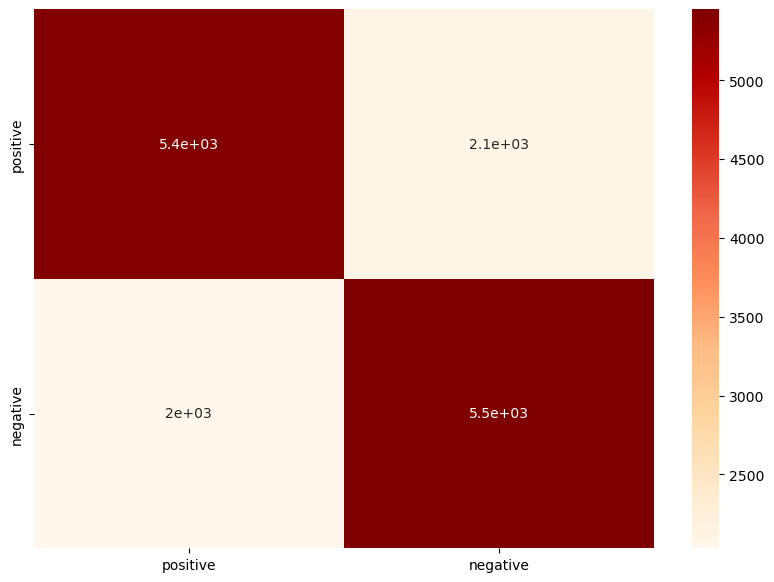

In [20]:
DecisionTree_clf_cm=confusion_matrix(y_test,DecisionTree_clf_predicted,labels=[1,0])
print(DecisionTree_clf_cm)

# Plot Confusion Matrix
DecisionTree_clf_df_cm = pd.DataFrame(DecisionTree_clf_cm, index = [i for i in ['positive', 'negative']],
              columns = [i for i in ['positive', 'negative']])
plt.figure(figsize = (10,7))
sns.heatmap(DecisionTree_clf_df_cm, annot=True,cmap="OrRd")

#### Word Cloud

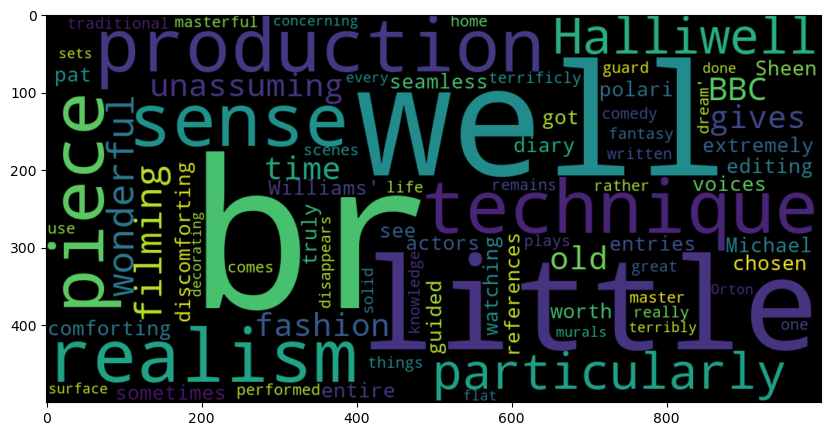

In [21]:
from wordcloud import WordCloud,STOPWORDS

#word cloud for positive review words
plt.figure(figsize=(10,10))
positive_text=imdb.review[1]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
positive_words=WC.generate(positive_text)
plt.imshow(positive_words,interpolation='bilinear')

<function matplotlib.pyplot.show(close=None, block=None)>

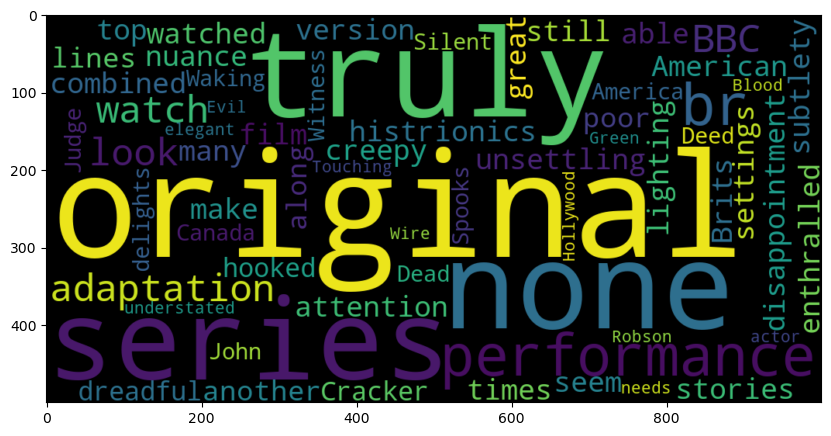

In [22]:
#Word cloud for negative review words
plt.figure(figsize=(10,10))
negative_text=imdb.review[5052]
WC=WordCloud(width=1000,height=500,max_words=500,min_font_size=5)
negative_words=WC.generate(negative_text)
plt.imshow(negative_words,interpolation='bilinear')
plt.show

### PART B
Feature Extraction with FastText, NLTK.
Clasification with Neural Networks (CNN, LSTM)

In [23]:
# we initialize the random number generator to a constant value so that we can easily reproduce results
seed = 7
np.random.seed(seed)

In [24]:
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata

In [25]:
# #Removing the html strips
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#Define function for removing special characters
def remove_special_characters(text, remove_digits=True):
    pattern=r'[^a-zA-z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

#Stemming the text
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text= ' '.join([ps.stem(word) for word in text.split()])
    return text

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_special_characters(text)
    text = simple_stemmer(text)
    return text
#Apply function on review column
imdb['review']=imdb['review'].apply(denoise_text)

In [29]:
import nltk
from nltk.corpus import stopwords

# Download NLTK resources (if not already downloaded)
nltk.download('punkt')
nltk.download('stopwords')

# Load stop words
stop = set(stopwords.words('english'))

# Assuming imdb['review'] contains lists of tokens
imdb['review'] = imdb['review'].apply(lambda x: [word.lower() for word in x])

# Filter out non-alphanumeric tokens and stop words
imdb['review'] = imdb['review'].apply(lambda x: [word for word in x if word.isalnum() and word not in stop])


[nltk_data] Downloading package punkt to /home/mac/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/mac/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [30]:
# View the head of the review column after cleaning and tokenizing
imdb.head(10)

,review,sentiment
0,"[one, review, ha, mention, watch, 1, oz, episo...",1
1,"[wonder, littl, product, film, techniqu, veri,...",1
2,"[thought, thi, wa, wonder, way, spend, time, h...",1
3,"[basic, famili, littl, boy, jake, think, zombi...",0
4,"[petter, mattei, love, time, money, visual, st...",1
5,"[probabl, alltim, favorit, movi, stori, selfle...",1
6,"[sure, would, like, see, resurrect, date, seah...",1
7,"[thi, show, wa, amaz, fresh, innov, idea, 70, ...",0
8,"[encourag, posit, comment, thi, film, wa, look...",0
9,"[like, origin, gut, wrench, laughter, like, th...",1


In [31]:
from gensim.models.fasttext import FastText

# Set values for various parameters
feature_size = 150    # Word vector dimensionality  
window_context = 50   # Context window size                                                                                    
min_word_count = 5    # Minimum word count                        
sample = 1e-4        # Downsample setting for frequent words

# Initialize FastText model
fastxt = FastText(sentences=imdb.review[:], vector_size=feature_size, window=window_context, 
                  min_count=min_word_count, sample=sample, sg=1, epochs=4, workers=4)

print(fastxt)


FastText<vocab=30713, vector_size=150, alpha=0.025>


In [32]:
# Print the vocab that the fastxt model has learnt
list(fastxt.wv.key_to_index.keys())[:50]


['thi',
 'movi',
 'wa',
 'film',
 'hi',
 'one',
 'like',
 'ha',
 'time',
 'good',
 'make',
 'get',
 'see',
 'charact',
 'veri',
 'watch',
 'even',
 'stori',
 'would',
 'onli',
 'realli',
 'scene',
 'show',
 'look',
 'well',
 'much',
 'end',
 'peopl',
 'great',
 'bad',
 'go',
 'love',
 'becaus',
 'also',
 'think',
 'play',
 'first',
 'act',
 'dont',
 'way',
 'thing',
 'made',
 'could',
 'ani',
 'know',
 'say',
 'seem',
 'mani',
 'work',
 'want']

In [33]:
# print  number of unique words
print("Number of unique words: ")
print(len(fastxt.wv))


Number of unique words: 
30713


In [39]:
# Get keyedvectors from fastxt to use as embedding weights or matrices
word_keyvec = (fastxt.wv.vectors_vocab)

# Generate word index for feature extraction
word2index = {token: token_index for token_index, token in enumerate(fastxt.wv.index_to_key)}

# Show the first 10 words to know what the most frequent words of the dataset are
index_arr = list(word2index.keys())[:10]
print("First 10 words:")
print(index_arr)


First 10 words:
['thi', 'movi', 'wa', 'film', 'hi', 'one', 'like', 'ha', 'time', 'good']


### Feature Extraction
Here, we are extracting features from the fastxt model created above. These features will be used as input to our neural network

In [40]:
# import pad sequence from keras
from keras.preprocessing.sequence import pad_sequences

# initialize an empty array to hold our reviews
new_imdb_review = [] 
# map through the lists in review columns, get each word and map it to indices
for sent in imdb.review:
    temp_sent = []
    for word in sent[:feature_size]:
            try:
                temp_sent.append(word2index[word])
            except KeyError:
                      continue
    new_imdb_review.append(temp_sent)


# Pad the column, for those shorter than the max features length    
padded_imdb_review = pad_sequences(new_imdb_review, maxlen=feature_size) # Use keras to pad leading 0s to reviews
padded_imdb_review = np.array(padded_imdb_review) # Convert the review list to a numpy array


In [41]:
# print the first review after feature extraction and padding
padded_imdb_review[1]

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,   116,    58,
         230,     3,  1621,    14, 13412,    14,  1120,    64,  1802,
         455,  9204,   211,  1736,   269,   281,    52,   375,    24,
        2028,   437,  3520,    19,     7,   113,     7,   424,  2726,
         322,    12, 10099,   469,  2000,   763,   647,  4905,  2051,
          19,    24,   214,    15, 30647,   391,    69,   281,   722,
         230,     5,    28,   722,   123,     4,    61,  1736,    20,
          53,   297,    58,    40,   911,  1755,   185,    72,  1148,
         561,  1621,

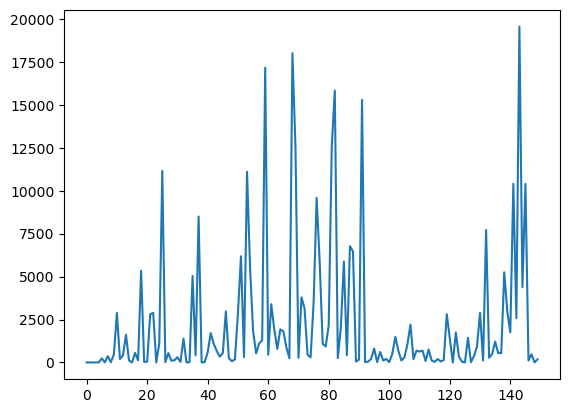

In [42]:
# get plot distribution of the first review after padding
plt.plot(padded_imdb_review[0])

In [43]:
# import all modules needed to build neural networks
from keras.callbacks import Callback
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Conv1D, GlobalMaxPooling1D, MaxPooling1D
from keras.callbacks import EarlyStopping


# set parameters:
max_features = len(word_keyvec)
maxlen = embedding_dims = feature_size
batch_size = 40
filters = 100
kernel_size = 3
hidden_dims = 100
epochs = 6

# Custom callback to run test during training
class TestCallback(Callback):
    
    def __init__(self, test_data):
        self.test_data = test_data

    def on_epoch_end(self, epoch, logs={}):
        x, y = self.test_data
        loss, acc = self.model.evaluate(x, y, verbose=0)
        print('\nTesting loss: {}, acc: {}\n'.format(loss, acc))

In [44]:
# Split data into three; train, validation and test
x_train, x_test, y_train, y_test = train_test_split(padded_imdb_review, imdb.sentiment, test_size=0.20, shuffle=True)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.25, random_state=1, shuffle=True)

print(len(x_train), 'train sequences')
print(len(x_val), 'val sequences')
print(len(x_test), 'test sequences')

30000 train sequences
10000 val sequences
10000 test sequences


### CNN Model


In [45]:
print('Build model...')
cnn_model = Sequential()

# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
cnn_model.add(Embedding(max_features,
                    embedding_dims,
                    weights = [word_keyvec],
                    trainable=True,
                    input_length=maxlen))
cnn_model.add(Dropout(0.5))

# we add a Convolution1D, which will learn filters
# word group filters of size filter_length:
cnn_model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
# we use max pooling:
cnn_model.add(GlobalMaxPooling1D())

# We add a vanilla hidden layer:
cnn_model.add(Dense(hidden_dims))
cnn_model.add(Dropout(0.5))
cnn_model.add(Activation('relu'))

# We project onto a single unit output layer, and squash it with a sigmoid:
cnn_model.add(Dense(1))
cnn_model.add(Activation('sigmoid'))

cnn_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
cnn_model.summary()

Build model...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 150, 150)          4606950   
                                                                 
 dropout (Dropout)           (None, 150, 150)          0         
                                                                 
 conv1d (Conv1D)             (None, 148, 100)          45100     
                                                                 
 global_max_pooling1d (Glob  (None, 100)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                         

2023-11-15 21:11:00.019243: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-11-15 21:11:00.183505: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [46]:
# Fit cnn model and test the model with a callback
cnn_model_hist = cnn_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
            validation_data=(x_val, y_val),
                 callbacks=[TestCallback((x_test, y_test)), EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/6
750/750 [==============================] - ETA: 0s - loss: 0.6315 - accuracy: 0.6418
Testing loss: 0.4954603910446167, acc: 0.766700029373169

750/750 [==============================] - 20s 26ms/step - loss: 0.6315 - accuracy: 0.6418 - val_loss: 0.4944 - val_accuracy: 0.7696
Epoch 2/6
750/750 [==============================] - ETA: 0s - loss: 0.4723 - accuracy: 0.7792
Testing loss: 0.3831730782985687, acc: 0.83160001039505

750/750 [==============================] - 18s 25ms/step - loss: 0.4723 - accuracy: 0.7792 - val_loss: 0.3794 - val_accuracy: 0.8381
Epoch 3/6
750/750 [==============================] - ETA: 0s - loss: 0.3977 - accuracy: 0.8236
Testing loss: 0.36972808837890625, acc: 0.8331000208854675

750/750 [==============================] - 16s 21ms/step - loss: 0.3977 - accuracy: 0.8236 - val_loss: 0.3650 - val_accuracy: 0.8434
Epoch 4/6
749/750 [============================>.] - ETA: 0s - loss: 0.3646 - accuracy: 0.8408
Testing loss: 0.36348438262939453, acc: 0.8435

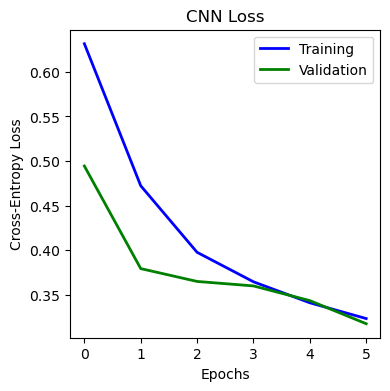

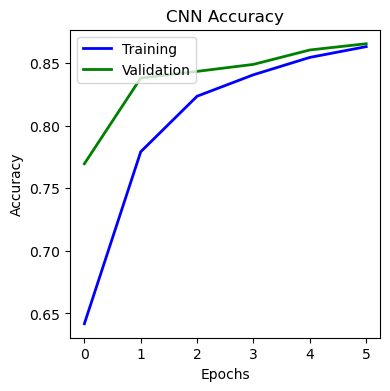

In [47]:
# summarize history for Loss
plt.figure(figsize=(4,4))
plt.plot(cnn_model_hist.history['loss'], lw=2.0, color='b', label='Training')
plt.plot(cnn_model_hist.history['val_loss'], lw=2.0, color='g', label='Validation')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')

# summarize history for accuracy
plt.figure(figsize=(4,4))
plt.plot(cnn_model_hist.history['accuracy'], lw=2.0, color='b', label='Training')
plt.plot(cnn_model_hist.history['val_accuracy'], lw=2.0, color='g', label='Validation')
plt.title('CNN Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')

### LSTM Model

In [48]:
from keras.layers import Dense , Input , LSTM , Embedding, Dropout , Activation, GRU, Flatten
from keras.layers import Bidirectional, GlobalMaxPool1D

lstm_model = Sequential()
# we start off with an efficient embedding layer which maps
# our vocab indices into embedding_dims dimensions
lstm_model.add(Embedding(max_features,
                    embedding_dims,
                    weights = [word_keyvec],
                    trainable=True,
                    input_length=maxlen))
lstm_model.add(Bidirectional(LSTM(64, return_sequences = True, recurrent_dropout=0.5)))
lstm_model.add(GlobalMaxPool1D())
lstm_model.add(Dense(19, activation="relu"))
lstm_model.add(Dropout(0.5))
lstm_model.add(Dense(1, activation="sigmoid"))
lstm_model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
                   metrics=['accuracy'])
lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 150, 150)          4606950   
                                                                 
 bidirectional (Bidirection  (None, 150, 128)          110080    
 al)                                                             
                                                                 
 global_max_pooling1d_1 (Gl  (None, 128)               0         
 obalMaxPooling1D)                                               
                                                                 
 dense_2 (Dense)             (None, 19)                2451      
                                                                 
 dropout_2 (Dropout)         (None, 19)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [49]:
# fit lstm model and test the model with a callback
lstm_model_hist = lstm_model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
            validation_data=(x_val, y_val),
                 callbacks=[TestCallback((x_test, y_test)), EarlyStopping(monitor='val_loss', patience=2)])

Epoch 1/6
750/750 [==============================] - ETA: 0s - loss: 0.4719 - accuracy: 0.7770
Testing loss: 0.33346253633499146, acc: 0.8537999987602234

750/750 [==============================] - 122s 158ms/step - loss: 0.4719 - accuracy: 0.7770 - val_loss: 0.3239 - val_accuracy: 0.8630
Epoch 2/6
750/750 [==============================] - ETA: 0s - loss: 0.3245 - accuracy: 0.8702
Testing loss: 0.2938373386859894, acc: 0.8751000165939331

750/750 [==============================] - 126s 167ms/step - loss: 0.3245 - accuracy: 0.8702 - val_loss: 0.2779 - val_accuracy: 0.8844
Epoch 3/6
750/750 [==============================] - ETA: 0s - loss: 0.2719 - accuracy: 0.8952
Testing loss: 0.2956869304180145, acc: 0.8788999915122986

750/750 [==============================] - 123s 165ms/step - loss: 0.2719 - accuracy: 0.8952 - val_loss: 0.2756 - val_accuracy: 0.8894
Epoch 4/6
750/750 [==============================] - ETA: 0s - loss: 0.2370 - accuracy: 0.9111
Testing loss: 0.2875581681728363, acc

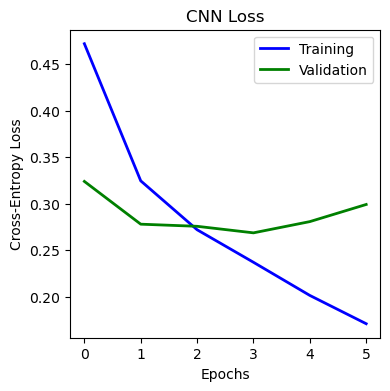

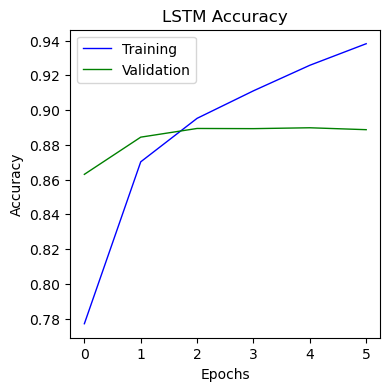

In [50]:
# summarize history for Loss
plt.figure(figsize=(4,4))
plt.plot(lstm_model_hist.history['loss'], lw=2.0, color='b', label='Training')
plt.plot(lstm_model_hist.history['val_loss'], lw=2.0, color='g', label='Validation')
plt.title('CNN Loss')
plt.xlabel('Epochs')
plt.ylabel('Cross-Entropy Loss')
plt.legend(loc='upper right')

# summarize history for accuracy
plt.figure(figsize=(4,4))
plt.plot(lstm_model_hist.history['accuracy'], lw=1.0, color='b', label='Training')
plt.plot(lstm_model_hist.history['val_accuracy'], lw=1.0, color='g', label='Validation')
plt.title('LSTM Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='upper left')